# Text Mining

## Contents <a id=ov>
1. [Data Set](#data)
2. [Wordbook sentiment](#wordbook)
3. [Topic Modeling](#lda)





## Data Set <a id=data>
[Back to Content Overview](#ov)

The data set consists of all speeches of high ranking ECB representatives. (https://www.ecb.europa.eu/press/key/html/downloads.en.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

In [2]:
#Import data from a excel_file
df=pd.read_csv('all_ECB_speeches.csv',sep='|')
print(df)

            date              speakers  \
0     2023-02-27                   NaN   
1     2023-02-16        Philip R. Lane   
2     2023-02-16         Fabio Panetta   
3     2023-02-15     Christine Lagarde   
4     2023-02-07                   NaN   
...          ...                   ...   
2656  1997-05-13  Alexandre Lamfalussy   
2657  1997-04-30  Alexandre Lamfalussy   
2658  1997-04-22  Alexandre Lamfalussy   
2659  1997-03-10  Alexandre Lamfalussy   
2660  1997-02-07  Alexandre Lamfalussy   

                                                  title  \
0     Macro-Financial Stability in the EU: Some Less...   
1     The euro area hiking cycle: an interim assessment   
2                Monetary policy after the energy shock   
3     European Parliament plenary debate on the ECB ...   
4          Monetary policy in times of pandemic and war   
...                                                 ...   
2656  The European Central Bank: independent and acc...   
2657  The operation of 

In [3]:
# Take a small sample to test you code efficiently.
df=df.sample(frac=0.1)

In [4]:
# Change the index to apply time series methods
df.index=pd.to_datetime(df['date'])
print(df)

                  date                     speakers  \
date                                                  
2003-09-05  2003-09-05         Willem F. Duisenberg   
2001-02-02  2001-02-02              Christian Noyer   
2005-09-30  2005-09-30  José Manuel González-Páramo   
2008-04-17  2008-04-17     Gertrude Tumpel-Gugerell   
2010-11-30  2010-11-30          Jean-Claude Trichet   
...                ...                          ...   
2019-01-17  2019-01-17        Sabine Lautenschläger   
2015-11-16  2015-11-16                  Yves Mersch   
1999-08-27  1999-08-27         Willem F. Duisenberg   
2000-05-22  2000-05-22         Willem F. Duisenberg   
2018-11-28  2018-11-28                 Benoît Cœuré   

                                                        title  \
date                                                            
2003-09-05          Changing fortunes: financing world growth   
2001-02-02               Where are we 11 months before E-day?   
2005-09-30  La reforma d

In [5]:
print(df.resample('M').count())

            date  speakers  title  subtitle  contents
date                                                 
1998-01-31     1         1      1         1         1
1998-02-28     0         0      0         0         0
1998-03-31     0         0      0         0         0
1998-04-30     0         0      0         0         0
1998-05-31     0         0      0         0         0
...          ...       ...    ...       ...       ...
2022-09-30     1         1      1         1         1
2022-10-31     1         1      1         1         0
2022-11-30     4         4      4         4         3
2022-12-31     0         0      0         0         0
2023-01-31     1         1      1         1         1

[301 rows x 5 columns]


Text(0.5, 1.0, 'Articles per Month')

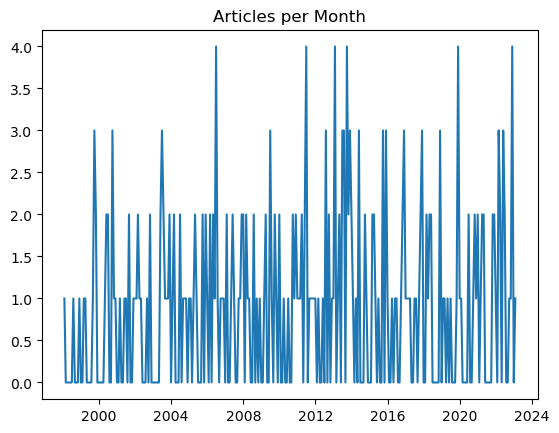

In [9]:
#Plot the Articles per Month
plt.plot(df.resample('M').count()['date'])
plt.title('Articles per Month')

In [8]:
import plotly.graph_objects as go
import plotly.express as px
fig=go.Figure(go.Bar(x=df.resample('Y').count().index,y=df.resample('Y').count()['date']))
fig

## Word book sentiment

The easiest way to measure the sentiment of texts is to count prelabeled keywords:

In [7]:
# Load the wordbook file
word_book=pickle.load(open('newwordbook.p','rb'))
print(word_book)

[['negative', ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational', 'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish', 'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating', 'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences', 'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness', 'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse', 'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing', 'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate', 'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries', 'adversary', 'adverse', 'adversely', 'adversities', 'adv

<span style="color:blue"><b>Task:</b></span> Convert this word_book object in a more useful data structure!

In [10]:
word_book={key:words for key,words in word_book}
print(word_book)

{'negative': ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational', 'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish', 'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating', 'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences', 'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness', 'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse', 'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing', 'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate', 'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries', 'adversary', 'adverse', 'adversely', 'adversities', 'adve

<span style="color:blue"><b>Task:</b></span> Count the 'negative', 'positive', 'uncertainty' words in the texts and save the sum of hits in separate columns!

In [11]:
#Iterate over [ 'negative', 'positive', 'uncertainty']:
for cath in ['negative', 'positive', 'uncertainty']:
    # Iterarte over all texts
    counts_per_cath=[]
    for text in tqdm(df['contents'],desc=cath):
        #Iterate over all Words in the word_book
        count_per_text=0
        for word in word_book[cath]:
            count_per_text+=str(text).count(word)
            
        counts_per_cath.append(count_per_text)
            
    df[cath]=counts_per_cath 

uncertainty: 100%|███████████████████████████████████████████████████████████████████| 266/266 [00:02<00:00, 96.62it/s]


In [12]:
for cath in ['negative', 'positive', 'uncertainty']:
    df[cath]=[sum(str(text).count(word) for word in word_book[cath]) for text in tqdm(df['contents'],desc=cath)]

uncertainty: 100%|██████████████████████████████████████████████████████████████████| 266/266 [00:02<00:00, 130.73it/s]


In [13]:
# Aggregate the data monthly
df_m=df.resample('M').sum()
print(df_m)

C:\Users\opeye\AppData\Local\Temp\ipykernel_36368\547878948.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



            negative  positive  uncertainty
date                                       
1998-01-31       176        64           44
1998-02-28         0         0            0
1998-03-31         0         0            0
1998-04-30         0         0            0
1998-05-31         0         0            0
...              ...       ...          ...
2022-09-30       133        51           37
2022-10-31         0         0            0
2022-11-30       466       200          137
2022-12-31         0         0            0
2023-01-31        89        31           19

[301 rows x 3 columns]


<span style="color:blue"><b>Task:</b></span> Calculate the monthly tone. (``TONE = (#POS - #NEG) / (#POS + #NEG)``)

In [14]:
df_m['TONE']=(df_m['positive'] - df_m['negative'])/(df_m['positive'] +df_m['negative'] )

<span style="color:blue"><b>Task:</b></span> Plot the monthly tone.

In [15]:
fig=go.Figure(go.Scatter(x=df_m.index,y=df_m['TONE']))
fig

<span style="color:blue"><b>Task:</b></span> Plot the 12-month rolling window mean of the monthly tone.

In [16]:
vector=np.zeros(len(df_m))
vector[:]=np.nan
for d in range(11,len(df_m)):
    vector[d]=df_m['TONE'][d-11:d+1].mean()
    
df_m['TONE_12']=vector
    
fig=go.Figure(go.Scatter(x=df_m.index,y=df_m['TONE_12']))
fig  

## Topic Modeling <a id=lda>
[Back to Content Overview](#ov)

### Document Frequency Matrix
The Document Frequency Matrix has the dimensions D X V, where D is the number of documents and V the size of the vocabulary (Number of unique word in the Corpus).
It saves the total count of every word in every document and is usually very sparse.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer(min_df=2)
df=df.dropna(subset=['contents'])
dtm = cv.fit_transform(df['contents'])
print('DTM created')

DTM created


In [19]:
print(dtm)

  (0, 2038)	1
  (0, 4993)	1
  (0, 4808)	2
  (0, 12503)	8
  (0, 5461)	28
  (0, 10625)	1
  (0, 1811)	11
  (0, 3666)	1
  (0, 12408)	1
  (0, 3717)	1
  (0, 8772)	1
  (0, 7961)	77
  (0, 11304)	158
  (0, 4362)	3
  (0, 1975)	1
  (0, 1343)	1
  (0, 1135)	4
  (0, 168)	4
  (0, 10669)	1
  (0, 7243)	1
  (0, 9896)	2
  (0, 11144)	2
  (0, 1834)	1
  (0, 5064)	1
  (0, 10196)	1
  :	:
  (260, 3408)	1
  (260, 3650)	1
  (260, 11622)	2
  (260, 3064)	1
  (260, 7840)	2
  (260, 5895)	1
  (260, 2181)	12
  (260, 10659)	1
  (260, 5143)	15
  (260, 2221)	1
  (260, 11475)	1
  (260, 9448)	1
  (260, 11013)	1
  (260, 4056)	1
  (260, 11483)	1
  (260, 12175)	1
  (260, 8136)	2
  (260, 4334)	1
  (260, 7783)	1
  (260, 4421)	1
  (260, 8761)	1
  (260, 10175)	1
  (260, 4414)	1
  (260, 9490)	1
  (260, 812)	1


In [20]:
print(cv.get_feature_names())

['00', '000', '01', '02', '03', '05', '06', '07', '09', '10', '100', '1000', '1009', '101', '102', '1024', '1025', '103', '104', '105', '106', '107', '108', '1081', '109', '10th', '11', '110', '111', '1110', '1113', '112', '113', '114', '115', '116', '117', '118', '12', '120', '121', '122', '123', '124', '12484', '125', '126', '127', '128', '129', '13', '130', '131', '133', '135', '136', '137', '138', '139', '13th', '14', '140', '141', '145', '147', '14th', '15', '150', '152', '153', '154', '15487', '155', '156', '15th', '16', '160', '162', '167', '16th', '17', '170', '172', '1789', '179', '17th', '18', '18315', '184', '186', '1870', '189', '18th', '19', '190', '1900', '1913', '1918', '192', '1920s', '1923', '1929', '193', '1930s', '1933', '1936', '1939', '1940', '1944', '1946', '1948', '195', '1950', '1950s', '1953', '1954', '1955', '1956', '1957', '1958', '1960', '1960s', '1961', '1963', '1965', '1967', '1969', '1970', '1970s', '1971', '1972', '1973', '1974', '1975', '1976', '1977', 

C:\Users\opeye\anaconda3\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### Estimate LDA Model

The most frequently used topic model is the Latent Dirichlet Allocation (LDA).

#### The algorithm
Look into lda_gibbs.py

In [21]:
from sklearn.decomposition import LatentDirichletAllocation

In [22]:
K=12
LDA = LatentDirichletAllocation(n_components=K,n_jobs=-1,max_iter=100,verbose=1)
LDA.fit(dtm)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

LatentDirichletAllocation(max_iter=100, n_components=12, n_jobs=-1, verbose=1)

### Word Clouds

In [23]:
max_words=100
voc=cv.get_feature_names()
print(voc)

['00', '000', '01', '02', '03', '05', '06', '07', '09', '10', '100', '1000', '1009', '101', '102', '1024', '1025', '103', '104', '105', '106', '107', '108', '1081', '109', '10th', '11', '110', '111', '1110', '1113', '112', '113', '114', '115', '116', '117', '118', '12', '120', '121', '122', '123', '124', '12484', '125', '126', '127', '128', '129', '13', '130', '131', '133', '135', '136', '137', '138', '139', '13th', '14', '140', '141', '145', '147', '14th', '15', '150', '152', '153', '154', '15487', '155', '156', '15th', '16', '160', '162', '167', '16th', '17', '170', '172', '1789', '179', '17th', '18', '18315', '184', '186', '1870', '189', '18th', '19', '190', '1900', '1913', '1918', '192', '1920s', '1923', '1929', '193', '1930s', '1933', '1936', '1939', '1940', '1944', '1946', '1948', '195', '1950', '1950s', '1953', '1954', '1955', '1956', '1957', '1958', '1960', '1960s', '1961', '1963', '1965', '1967', '1969', '1970', '1970s', '1971', '1972', '1973', '1974', '1975', '1976', '1977', 

In [24]:
import sys
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud

{'de': 519.98, 'la': 377.96, 'et': 206.47, 'des': 171.64, 'le': 159.01, 'les': 158.04, 'une': 102.08, 'en': 98.22, 'du': 85.08, 'dans': 77.08, 'un': 74.57, 'est': 74.08, 'que': 70.67, 'il': 56.52, 'qui': 53.08, 'pour': 51.01, 'par': 50.44, 'monétaire': 50.08, 'au': 49.08, 'sur': 47.08, 'nous': 42.08, 'européenne': 39.08, 'banque': 36.89, 'ce': 33.08, 'centrale': 33.08, 'plus': 29.85, 'stabilité': 29.08, 'crise': 29.08, 'être': 28.96, 'économique': 28.06, 'monnaie': 28.03, 'euro': 27.45, 'se': 26.67, 'ces': 25.08, 'ne': 25.08, 'qu': 25.08, 'avec': 24.08, 'niveau': 23.08, 'incertitude': 23.08, 'pas': 23.08, 'unique': 22.13, 'crédibilité': 22.08, 'ont': 22.08, 'banques': 22.08, 'ou': 22.08, 'sont': 22.08, 'politique': 22.01, 'été': 21.08, 'très': 21.08, 'était': 21.08, 'économie': 21.08, 'financière': 20.97, 'même': 20.08, 'prix': 20.08, 'cette': 19.08, 'aux': 19.08, 'comme': 19.08, 'conditions': 18.53, 'transition': 18.18, 'je': 17.99, 'fait': 17.08, 'aussi': 16.08, 'mais': 16.08, 'non':

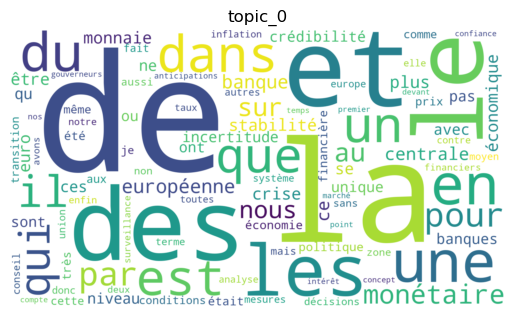

{'the': 13621.41, 'of': 7805.26, 'and': 6273.15, 'to': 5320.28, 'in': 4390.67, 'financial': 3486.67, 'for': 2174.41, 'is': 1815.09, 'that': 1681.22, 'on': 1606.72, 'banks': 1558.27, 'as': 1457.36, 'market': 1305.01, 'be': 1283.12, 'this': 1247.99, 'are': 1146.52, 'by': 1139.44, 'banking': 1040.92, 'risk': 955.93, 'with': 952.73, 'have': 918.29, 'system': 851.94, 'markets': 837.49, 'it': 803.67, 'from': 693.94, 'at': 687.94, 'which': 687.89, 'bank': 684.41, 'more': 643.9, 'also': 609.78, 'integration': 605.97, 'an': 594.22, 'will': 586.97, 'their': 571.73, 'has': 569.69, 'ecb': 565.32, 'these': 545.55, 'risks': 541.09, 'sector': 540.17, 'stability': 518.05, 'european': 504.66, 'capital': 497.99, 'not': 492.54, 'or': 478.28, 'can': 468.86, 'should': 466.14, 'central': 463.89, 'would': 463.61, 'supervision': 462.57, 'institutions': 442.36, 'we': 434.29, 'supervisory': 415.71, 'credit': 409.41, 'crisis': 402.36, 'they': 391.55, 'may': 373.67, 'some': 367.83, 'between': 364.77, 'could': 363

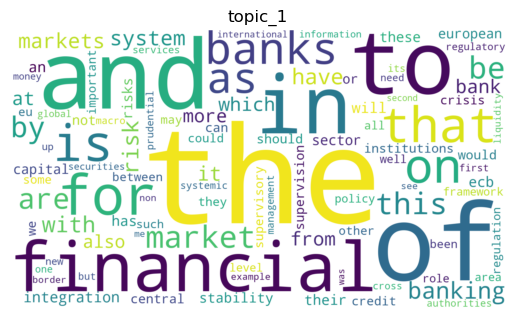

{'script': 0.08, 'recipient': 0.08, 'jeopardizing': 0.08, 'exterior': 0.08, 'dematerialisation': 0.08, 'popularised': 0.08, 'workforce': 0.08, 'sharpened': 0.08, 'portals': 0.08, 'praise': 0.08, 'incredibly': 0.08, 'switched': 0.08, 'secretariats': 0.08, 'guideposts': 0.08, 'restrain': 0.08, '179': 0.08, 'tireless': 0.08, 'honesty': 0.08, 'vertical': 0.08, 'son': 0.08, 'cargo': 0.08, 'adam': 0.08, 'preferably': 0.08, 'james': 0.08, 'allan': 0.08, 'meltzer': 0.08, 'disequilibrium': 0.08, 'tallinn': 0.08, 'unanimously': 0.08, 'florence': 0.08, 'alertness': 0.08, 'multilateralism': 0.08, 'mapped': 0.08, 'insist': 0.08, 'temperatures': 0.08, 'interpretations': 0.08, 'naples': 0.08, 'peaking': 0.08, 'geopolitics': 0.08, 'rounding': 0.08, 'contend': 0.08, 'keeps': 0.08, '390': 0.08, '17th': 0.08, 'vernetzung': 0.08, 'hesse': 0.08, 'niche': 0.08, 'weo': 0.08, 'scenes': 0.08, '1956': 0.08, 'regionalise': 0.08, 'sped': 0.08, 'steepest': 0.08, 'börse': 0.08, 'penalises': 0.08, 'jacobsson': 0.08,

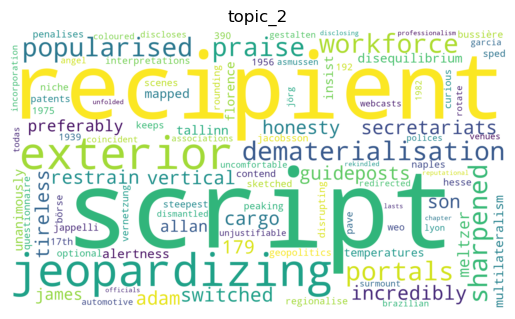

{'center': 1.72, 'geneva': 1.08, 'ch': 1.0, 'praet': 0.08, 'peter': 0.08, 'www': 0.08, 'issues': 0.08, 'lecture': 0.08, 'studies': 0.08, '21': 0.08, '2015': 0.08, 'organised': 0.08, 'september': 0.08, 'current': 0.08, 'download': 0.08, 'banking': 0.08, 'environment': 0.08, 'available': 0.08, 'slides': 0.08, 'public': 0.08, 'member': 0.08, 'executive': 0.08, 'content': 0.08, 'board': 0.08, 'presentation': 0.08, 'find': 0.08, 'related': 0.08, 'out': 0.08, 'low': 0.08, 'about': 0.08, 'international': 0.08, 'economic': 0.08, 'interest': 0.08, 'from': 0.08, 'on': 0.08, 'also': 0.08, 'more': 0.08, 'for': 0.08, 'by': 0.08, 'see': 0.08, 'euro': 0.08, 'rate': 0.08, 'ecb': 0.08, 'monetary': 0.08, 'area': 0.08, 'policy': 0.08, 'the': 0.08, 'in': 0.08, 'and': 0.08, 'of': 0.08, 'script': 0.08, 'recipient': 0.08, 'jeopardizing': 0.08, 'exterior': 0.08, 'dematerialisation': 0.08, 'popularised': 0.08, 'workforce': 0.08, 'sharpened': 0.08, 'portals': 0.08, 'praise': 0.08, 'incredibly': 0.08, 'switched'

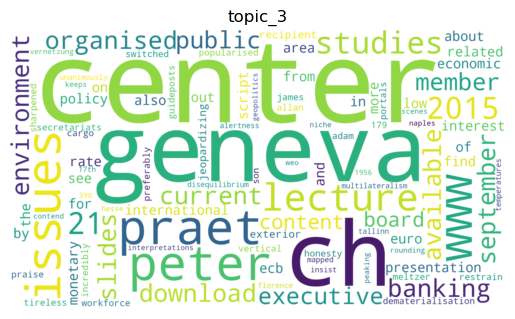

{'the': 8274.52, 'to': 4892.52, 'in': 3937.36, 'and': 3698.14, 'of': 3312.82, 'is': 1681.25, 'we': 1541.3, 'that': 1441.7, 'for': 1370.38, 'area': 1284.56, 'euro': 1275.83, 'have': 1142.81, 'are': 1116.94, 'our': 1101.12, 'this': 1078.65, 'on': 909.99, 'has': 868.97, 'by': 796.01, 'as': 794.28, 'with': 784.05, 'growth': 753.92, 'it': 736.14, 'be': 724.9, 'at': 710.28, 'crisis': 682.43, 'economic': 674.16, 'will': 668.8, 'but': 564.88, 'more': 563.03, 'fiscal': 540.16, 'not': 506.12, 'been': 496.01, 'measures': 476.37, 'from': 475.53, 'policy': 460.06, 'also': 450.17, 'ecb': 437.63, 'financial': 425.29, 'their': 403.41, 'monetary': 388.64, 'countries': 370.81, 'european': 355.02, 'economy': 346.86, 'policies': 329.06, 'year': 319.04, 'banks': 318.19, 'term': 317.39, 'an': 315.75, 'stability': 314.92, 'need': 313.85, 'they': 313.63, 'these': 312.18, 'risks': 298.92, 'which': 295.67, 'its': 294.62, 'reforms': 290.8, 'can': 283.78, 'recovery': 282.6, 'all': 269.15, 'there': 267.05, 'struct

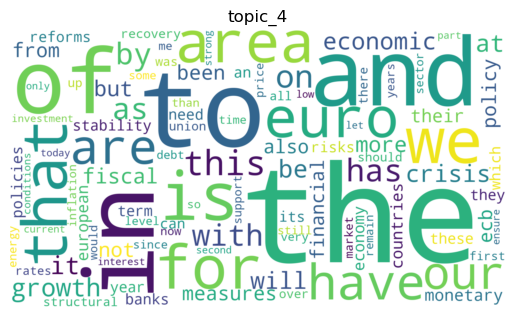

{'the': 20444.8, 'of': 9369.63, 'to': 6618.87, 'and': 6113.97, 'in': 6042.74, 'is': 3382.24, 'that': 3339.67, 'euro': 2741.43, 'for': 2644.59, 'be': 2200.39, 'as': 2056.06, 'it': 1964.28, 'this': 1934.56, 'on': 1569.17, 'will': 1462.11, 'not': 1443.54, 'are': 1439.66, 'european': 1396.4, 'with': 1382.2, 'area': 1375.78, 'have': 1353.82, 'by': 1293.23, 'we': 1218.03, 'which': 1202.95, 'has': 1190.73, 'an': 912.99, 'at': 911.2, 'monetary': 894.23, 'countries': 865.24, 'economic': 860.34, 'but': 776.85, 'was': 765.53, 'you': 750.33, 'all': 736.83, 'would': 734.86, 'from': 722.13, 'union': 705.9, 'national': 704.54, 'more': 702.08, 'ecb': 701.64, 'its': 701.33, 'also': 694.21, 'central': 677.14, 'one': 657.45, 'or': 643.18, 'been': 640.69, 'there': 626.78, 'currency': 598.37, 'can': 567.52, 'they': 566.02, 'single': 556.38, 'europe': 529.59, 'new': 527.27, 'some': 517.0, 'their': 514.28, 'stability': 501.86, 'only': 498.39, 'market': 477.44, 'should': 477.0, 'integration': 469.36, 'public'

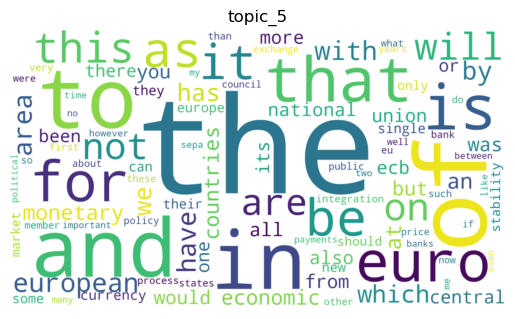

{'die': 1118.08, 'der': 962.6, 'und': 710.86, 'in': 537.4, 'zu': 345.08, 'den': 308.08, 'für': 268.02, 'ist': 254.08, 'im': 250.08, 'das': 244.08, 'auf': 242.08, 'von': 236.82, 'des': 222.51, 'nicht': 217.08, 'eine': 205.08, 'es': 189.91, 'wir': 180.08, 'auch': 177.08, 'sich': 169.08, 'mit': 155.65, 'dass': 146.08, 'ein': 146.08, 'werden': 143.08, 'haben': 130.08, 'wie': 121.08, 'sind': 113.08, 'als': 113.08, 'dem': 103.08, 'hat': 102.08, 'um': 98.08, 'einer': 94.08, 'an': 93.67, 'sie': 91.08, 'so': 86.79, 'bei': 84.08, 'ich': 84.08, 'aber': 82.08, 'nur': 80.08, 'vor': 77.08, 'zum': 76.08, 'deutschland': 76.02, 'wird': 74.08, 'diese': 72.08, 'zur': 71.08, 'nach': 70.08, 'aus': 67.08, 'noch': 62.08, 'über': 60.08, 'krise': 59.08, 'durch': 59.08, 'euro': 57.96, 'ezb': 57.08, 'kann': 56.08, 'einem': 54.08, 'einen': 54.08, 'europa': 53.95, 'war': 53.26, 'euroraum': 53.08, 'europäischen': 53.08, 'sepa': 51.17, 'geldpolitik': 51.08, 'können': 50.08, 'globalisierung': 50.08, 'dies': 49.08, 'w

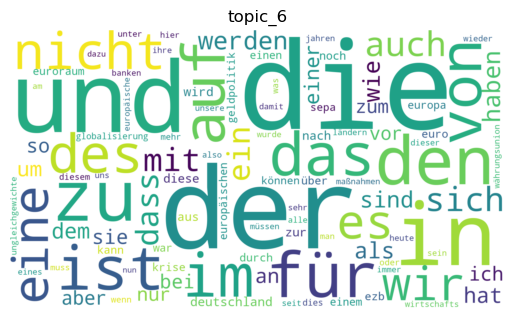

{'slides': 13.07, 'presentation': 10.98, 'content': 4.83, 'executive': 4.7, 'find': 4.68, 'board': 4.36, 'related': 4.13, 'download': 4.08, 'annex': 4.07, 'member': 3.94, 'out': 3.75, 'pdf': 3.08, 'benoît': 3.02, 'cœuré': 2.99, 'see': 2.99, 'about': 2.86, 'from': 2.64, 'right': 2.44, 'available': 2.23, 'column': 2.08, 'otmar': 2.06, 'background': 2.03, 'issing': 2.02, '2004': 1.94, '20': 1.84, 'paris': 1.71, 'hand': 1.49, 'organised': 1.47, 'information': 1.33, 'mexico': 1.08, 'city': 1.08, 'museum': 1.08, 'interactive': 1.08, 'ecbfrankfurt': 1.08, 'briefing': 1.08, 'format': 1.08, 'fr': 1.08, 'economics': 1.08, 'mai': 1.08, 'file': 1.07, 'kb': 1.07, 'prof': 1.03, 'october': 1.01, 'tour': 0.98, 'association': 0.95, 'responses': 0.93, '2016': 0.93, 'press': 0.86, '18': 0.84, 'cour': 0.78, 'ch': 0.08, 'geneva': 0.08, 'praet': 0.08, 'center': 0.08, 'france': 0.08, 'peter': 0.08, '11': 0.08, 'www': 0.08, 'january': 0.08, 'report': 0.08, 'main': 0.08, 'stand': 0.08, 'july': 0.08, 'depuis': 

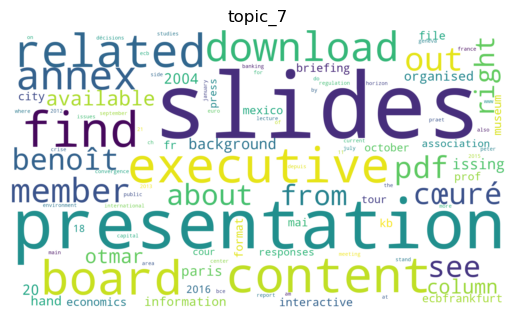

{'script': 0.08, 'recipient': 0.08, 'jeopardizing': 0.08, 'exterior': 0.08, 'dematerialisation': 0.08, 'popularised': 0.08, 'workforce': 0.08, 'sharpened': 0.08, 'portals': 0.08, 'praise': 0.08, 'incredibly': 0.08, 'switched': 0.08, 'secretariats': 0.08, 'guideposts': 0.08, 'restrain': 0.08, '179': 0.08, 'tireless': 0.08, 'honesty': 0.08, 'vertical': 0.08, 'son': 0.08, 'cargo': 0.08, 'adam': 0.08, 'preferably': 0.08, 'james': 0.08, 'allan': 0.08, 'meltzer': 0.08, 'disequilibrium': 0.08, 'tallinn': 0.08, 'unanimously': 0.08, 'florence': 0.08, 'alertness': 0.08, 'multilateralism': 0.08, 'mapped': 0.08, 'insist': 0.08, 'temperatures': 0.08, 'interpretations': 0.08, 'naples': 0.08, 'peaking': 0.08, 'geopolitics': 0.08, 'rounding': 0.08, 'contend': 0.08, 'keeps': 0.08, '390': 0.08, '17th': 0.08, 'vernetzung': 0.08, 'hesse': 0.08, 'niche': 0.08, 'weo': 0.08, 'scenes': 0.08, '1956': 0.08, 'regionalise': 0.08, 'sped': 0.08, 'steepest': 0.08, 'börse': 0.08, 'penalises': 0.08, 'jacobsson': 0.08,

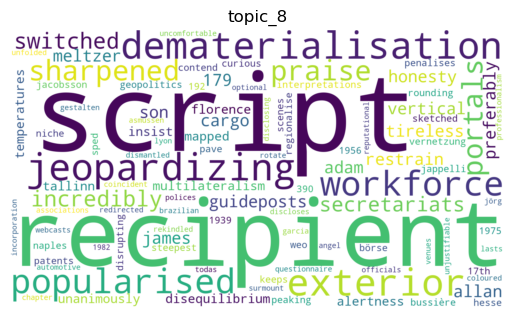

{'the': 10086.89, 'of': 5274.44, 'to': 3094.32, 'and': 3023.18, 'in': 2985.9, 'policy': 2292.89, 'monetary': 2031.61, 'is': 1556.88, 'inflation': 1509.92, 'that': 1400.45, 'on': 1229.96, 'for': 1121.07, 'price': 943.52, 'by': 903.7, 'ecb': 899.32, 'rates': 842.77, 'this': 839.85, 'term': 805.98, 'rate': 803.06, 'central': 727.74, 'as': 661.26, 'bank': 655.45, 'be': 645.11, 'at': 611.98, 'are': 573.44, 'stability': 551.48, 'with': 550.19, 'interest': 529.87, 'which': 523.97, 'our': 521.82, 'an': 491.99, 'have': 450.68, 'from': 439.1, 'market': 438.74, 'it': 427.8, 'money': 425.36, 'prices': 389.35, 'expectations': 380.08, 'not': 346.54, 'over': 328.14, 'time': 325.15, 'economic': 324.6, 'conditions': 319.97, 'these': 319.34, 'may': 318.31, 'asset': 309.62, 'area': 303.88, 'medium': 300.82, 'will': 295.97, 'economy': 290.62, 'has': 289.59, 'or': 287.29, 'financial': 279.18, 'banks': 277.43, 'can': 277.05, 'euro': 274.26, 'impact': 272.72, 'risk': 268.31, 'its': 268.23, 'would': 260.43, '

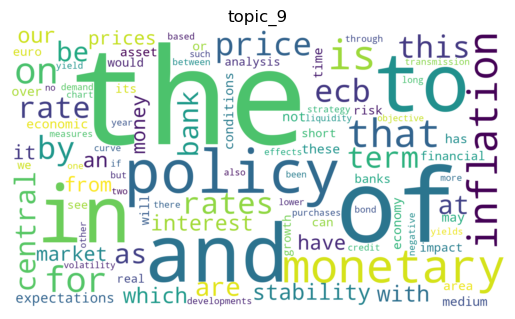

{'de': 1389.3, 'la': 752.2, 'el': 590.08, 'en': 528.47, 'que': 485.5, 'del': 390.08, 'los': 329.08, 'las': 252.08, 'es': 196.05, 'se': 195.04, 'un': 186.07, 'una': 179.08, 'con': 167.06, 'por': 149.08, 'para': 141.08, 'no': 133.43, 'al': 105.1, 'bce': 90.11, 'política': 90.08, 'como': 89.08, 'más': 79.08, 'ha': 78.08, 'monetaria': 73.08, 'su': 72.08, 'lo': 66.08, 'estabilidad': 66.08, 'euro': 57.61, 'déficit': 57.08, 'plazo': 52.08, 'inflación': 51.08, 'pacto': 46.08, 'también': 46.08, 'este': 43.08, 'sus': 40.08, 'si': 40.08, 'deuda': 39.08, 'países': 38.08, 'riesgo': 38.08, 'han': 37.08, 'medio': 36.08, 'entre': 35.59, 'sin': 35.08, 'son': 34.47, 'crecimiento': 33.08, 'parte': 33.08, 'supervisión': 33.08, 'económica': 32.08, 'precios': 32.08, 'marco': 31.08, 'europeo': 31.08, 'central': 29.17, 'normas': 29.08, 'sobre': 29.08, 'importante': 29.08, 'esta': 28.08, 'ser': 28.08, 'tanto': 28.08, 'nuevo': 28.08, 'objetivo': 28.08, 'decisiones': 28.08, 'nivel': 28.08, 'banco': 27.74, 'puede

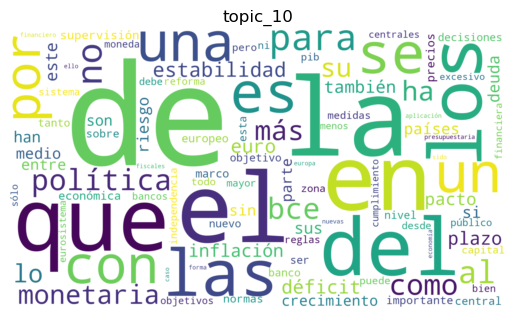

{'the': 3210.8, 'and': 2395.95, 'of': 2266.66, 'in': 2097.44, 'to': 961.42, 'is': 632.96, 'for': 552.9, 'global': 522.51, 'economic': 501.61, 'area': 445.86, 'international': 421.22, 'that': 411.37, 'euro': 409.78, 'countries': 395.72, 'has': 373.44, 'policy': 372.71, 'growth': 357.0, 'by': 345.04, 'on': 342.47, 'as': 332.45, 'see': 330.61, 'economies': 328.13, 'are': 312.86, 'world': 309.36, 'globalisation': 303.66, 'financial': 290.67, 'from': 289.16, 'economy': 263.22, 'have': 261.81, 'more': 255.47, 'capital': 252.67, 'trade': 247.0, 'labour': 240.08, 'no': 232.93, 'also': 212.06, 'europe': 207.81, 'domestic': 206.93, 'with': 205.25, 'income': 204.99, 'us': 203.86, 'monetary': 202.74, 'states': 202.31, 'gdp': 200.9, 'rate': 197.76, 'this': 185.37, 'investment': 184.1, 'exchange': 183.43, 'at': 183.03, 'effects': 180.33, 'been': 167.89, 'paper': 164.74, 'an': 163.8, 'such': 163.78, 'prices': 162.62, 'can': 162.21, 'new': 157.38, 'than': 156.98, 'increase': 156.12, 'which': 155.94, '

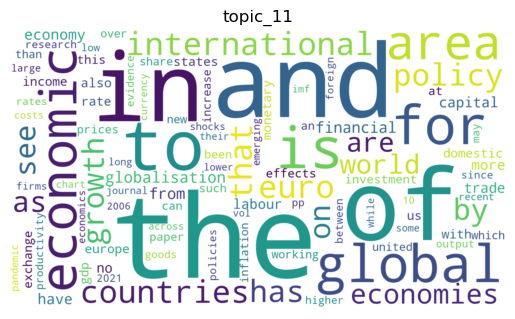

In [25]:
# Create Word Clouds
for t, topic in enumerate(LDA.components_):
    top_word_dict={voc[index]:topic[index] for index in np.argsort(-topic)[:max_words]}
    print({word: round(value,2) for word, value in top_word_dict.items()})
    wordcloud = WordCloud(max_words=max_words,
                          background_color="white",
                          collocations=False,
                          width=1920,
                          height=1080).generate_from_frequencies(top_word_dict)
    wordcloud.to_file("wordcloud_topic_"+str(t)+".pdf")
    plt.title("topic_"+str(t))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Spacy <a id=spacy>
[Back to Content Overview](#ov)

Spacy is a powerful library based on pre-trained language models. 

In [26]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en_core_web_sm
import spacy

     ---------------------------------------- 12.8/12.8 MB 5.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
# Define your language processing model
nlp = spacy.load("en_core_web_sm")
print(nlp)

In [28]:
print(df['contents'][0][:1000])

  Changing fortunes: financing world growth   Speech by Dr. Willem F. Duisenberg, President of the European Central Bank, at the 2003 Spruce Meadows Round Table,Calgary, Friday 5 September 2003. It is a great pleasure for me to be part of this round table discussion today and I would like to thank the organisers for inviting me to share some thoughts with you on the topic of financing world growth. Since 2000, we have witnessed terrorism, war and declines in world equity markets, all of which contributed to increasing an already ongoing deterioration in confidence in most countries. Now with the end of the major hostilities in Iraq, the reduction in geopolitical uncertainties and lower oil prices, a gradual upturn in world economic activity is expected and it is important that policy-makers do all they can to support it.  Given the breadth of this topic and therefore the strong temptation to overrun on my time allocation, I will focus on just two points. First, I would like to say a fe

In [29]:
# Define the document object
doc=nlp(df['contents'][0])

In [30]:
#Iterate over sentences
for sent in doc.sents:
    print(sent)
    print('\n'*3)

  Changing fortunes: financing world growth   Speech by Dr. Willem F. Duisenberg, President of the European Central Bank, at the 2003 Spruce Meadows Round Table,Calgary, Friday 5 September 2003.




It is a great pleasure for me to be part of this round table discussion today and I would like to thank the organisers for inviting me to share some thoughts with you on the topic of financing world growth.




Since 2000, we have witnessed terrorism, war and declines in world equity markets, all of which contributed to increasing an already ongoing deterioration in confidence in most countries.




Now with the end of the major hostilities in Iraq, the reduction in geopolitical uncertainties and lower oil prices, a gradual upturn in world economic activity is expected and it is important that policy-makers do all they can to support it.  




Given the breadth of this topic and therefore the strong temptation to overrun on my time allocation, I will focus on just two points.




First, I w

In [31]:
#Iterate over tokens
for token in doc[:25]:
    print((token.text+' '*15)[:15], (token.lemma_+' '*15)[:15], token.pos_, token.tag_, (token.dep_+' '*8)[:8],
            token.shape_, token.is_alpha, token.is_stop, sep='\t')

               	               	SPACE	_SP	dep     	  	False	False
Changing       	change         	VERB	VBG	amod    	Xxxxx	True	False
fortunes       	fortune        	NOUN	NNS	ROOT    	xxxx	True	False
:              	:              	PUNCT	:	punct   	:	False	False
financing      	finance        	VERB	VBG	acl     	xxxx	True	False
world          	world          	NOUN	NN	compound	xxxx	True	False
growth         	growth         	NOUN	NN	compound	xxxx	True	False
               	               	SPACE	_SP	dep     	  	False	False
Speech         	Speech         	PROPN	NNP	dobj    	Xxxxx	True	False
by             	by             	ADP	IN	agent   	xx	True	True
Dr.            	Dr.            	PROPN	NNP	compound	Xx.	False	False
Willem         	Willem         	PROPN	NNP	compound	Xxxxx	True	False
F.             	F.             	PROPN	NNP	compound	X.	False	False
Duisenberg     	Duisenberg     	PROPN	NNP	pobj    	Xxxxx	True	False
,              	,              	PUNCT	,	punct   	,	False	False
President      

<span style="color:blue"><b>Task:</b></span> Create a string with only the nouns remaining in the article.

In [33]:
# Create a new string containing only the nouns
nouns_only_string = " ".join(token.text for token in doc if token.pos_ == "NOUN")

# Print the new string with only nouns
print(nouns_only_string)


fortunes world growth pleasure part table discussion today organisers thoughts topic world growth terrorism war declines world equity markets deterioration confidence countries end hostilities reduction uncertainties oil prices upturn world activity policy makers breadth topic temptation time allocation points words roles limitations policy demand importance policies respect role reform growth help examples challenges respect policies reforms world policy reform achievement maintenance growth perspective term developments term growth costs inflation prospect prices factor growth price stability manner policy contribution level output employment growth Confidence price stability inflation risk premium interest rates interest rates turn investment growth employment evidence term trade price stability growth policy tune activity level run inflation growth policy role stability policies effect term growth performance savings capital formation employment innovation task policy maker price s

<span style="color:blue"><b>Task:</b></span> Lemmatize the text. Delete all non alpha and stop words.

In [34]:
# Lemmatize the text, remove non-alphabetic characters, and stop words
lemmatized_cleaned_text = " ".join(token.lemma_ for token in doc if token.is_alpha and not token.is_stop)

# Print the lemmatized and cleaned text
print(lemmatized_cleaned_text)


change fortune finance world growth Speech Willem Duisenberg President European Central Bank Spruce Meadows Round Table Calgary Friday September great pleasure round table discussion today like thank organiser invite share thought topic finance world growth witness terrorism war decline world equity market contribute increase ongoing deterioration confidence country end major hostility Iraq reduction geopolitical uncertainty low oil price gradual upturn world economic activity expect important policy maker support give breadth topic strong temptation overrun time allocation focus point like general word role add limitation monetary fiscal policy revive global demand importance microeconomic policy respect particular role structural reform increase potential growth second help regional specific example like present future challenge respect microeconomic policy structural reform world monetary fiscal policy structural reform achievement maintenance strong growth imply perspective extend 

### Excursus: Mulitprocessing
Spacy tokenizing is relatively slow, but the process can  be parallelized:

In [32]:
from joblib import Parallel, delayed

First we have to split the data into batches, as loading the model in a sub-process for each document would be too costly.

In [35]:
def make_batches(_list,n_batches=10):
    len_batch=len(_list)//n_batches+1
    return [_list[i*len_batch:min((i+1)*len_batch,len(_list))] for i in range(n_batches)]

In [36]:
batches=make_batches(df['contents'],36)
print(batches)

[date
2003-09-05      Changing fortunes: financing world growth   ...
2001-02-02      Where are we 11 months before E-day?   Speec...
2005-09-30      La reforma de las reglas fiscales de la Unió...
2008-04-17      Corporates in the Single Euro Payments Area:...
2010-11-30      Quarterly Hearing before the Committee on Ec...
2006-02-24      Europe’s Hard Fix: The Euro Area   Speech by...
2008-07-11      Financial systems, new technologies and prod...
2007-05-08      Making SEPA a reality – Involving the public...
Name: contents, dtype: object, date
2017-11-06      Europe in transformation: Structural, regula...
2013-11-27      Fünf Jahre Krise – wo steht Europa heute?   ...
2011-05-18      Strengthening European economic governance –...
2020-10-08       SPEECH  European economic governance: early...
2018-04-09      Presentation of the ECB Annual Report 2017 t...
2008-02-13      Opening remarks at the Second Symposium of t...
2010-10-12      Europe’s frameworks for macro-prudential ove..

Then we need to define a function that does the work in each sub-process.

In [37]:
def lemmatizer(texts:list)->list:
    nlp = spacy.load("en_core_web_sm")
    return [' '.join([token.lemma_ for token in  nlp(text) if token.is_alpha]) for text in texts]

Now we can run the task in ``n_jobs`` parallel tasks. Select ``n_jobs`` just below your available threads (usually the number of CPU cores times two).

In [38]:
results=Parallel(n_jobs=12,verbose=50)(delayed(lemmatizer)(batch) for batch in batches)
print(results)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done  14 out of  36 | elapsed:  2.7min remaining:  4.2min
[Parallel(n_jobs=12)]: Done  15 out 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [40]:
#Unpack the nested results
df['lemma'] =[lemma for batch in results for lemma in batch]

In [41]:
print(df['lemma'])

date
2003-09-05    change fortune finance world growth Speech by ...
2001-02-02    where be we month before e day Speech deliver ...
2005-09-30    La reforma de las reglas fiscale de la Unión M...
2008-04-17    Corporates in the Single Euro Payments area bu...
2010-11-30    Quarterly hearing before the Committee on Econ...
                                    ...                        
2019-01-17    Speech a supervisory perspective on and beyond...
2015-11-16    a currency beyond the nation state the euro an...
1999-08-27    Economic and Monetary Union in Europe the chal...
2000-05-22    the future of banking supervision and the inte...
2018-11-28    Welcome Remarks Remarks by Benoît Cœuré Member...
Name: lemma, Length: 261, dtype: object


<span style="color:blue"><b>Task:</b></span> Count the 'negative', 'positive', 'uncertainty' words in the texts using muliple threads. (Batches are not required for optimal performance.)

In [42]:


# Function to count the occurrences of 'negative', 'positive', and 'uncertainty' words in a text
def count_sentiment_words(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text.lower())
    sentiment_counts = {
        'negative': 0,
        'positive': 0,
        'uncertainty': 0
    }
    for token in doc:
        if token.text in ('negative', 'positive', 'uncertainty'):
            sentiment_counts[token.text] += 1
    return sentiment_counts

# Assuming you have a list of texts in 'contents' column of DataFrame 'df'
texts = df['contents'].tolist()

# Parallelize the counting process
results = Parallel(n_jobs=12, verbose=50)(delayed(count_sentiment_words)(text) for text in texts)

# Sum up the sentiment counts from all texts
total_sentiment_counts = {
    'negative': sum(result['negative'] for result in results),
    'positive': sum(result['positive'] for result in results),
    'uncertainty': sum(result['uncertainty'] for result in results)
}




[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   20.0s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   21.2s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:   22.5s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:   28.1s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:   28.6s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:   29.3s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:   29.4s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:   32.9s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:   35.0s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:   36.9s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:   39.2s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:   40.7s
[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:   42.1s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:   47.4s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=12)]: Done 132 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done 133 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done 134 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done 135 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done 136 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 137 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 139 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 140 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 141 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 142 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 143 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 144 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 145 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 147 tasks      | elapsed:  3.0min
[Paralle

In [46]:
print("Total Sentiment Counts:")
print(total_sentiment_counts)

Total Sentiment Counts:
{'negative': 330, 'positive': 222, 'uncertainty': 228}
